In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
df = pd.read_csv('drive/MyDrive/lecture_2/imdb_top_1000(2).csv')

In [ ]:
df.shape

In [ ]:
df.tail()

In [ ]:
df.dtypes

In [ ]:
df.isna().sum()

In [4]:
df.duplicated('Series_Title').sum()

NameError: name 'df' is not defined

In [10]:
df.duplicated('Series_Title')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
df[df.duplicated('Series_Title')]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


In [12]:
df[df['Series_Title'] == 'Drishyam']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,https://m.media-amazon.com/images/M/MV5BYmY3Mz...,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


In [13]:
df['Gross'] = df['Gross'].apply(lambda x: str(x).replace(",", "")).astype(float)

In [14]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [15]:
df['Runtime'] = df['Runtime'].apply(lambda x: x.replace(" min", "")).astype(float)

In [16]:
def clean_year(x):
  if x.isdigit():
    return float(x)
  else:
    return np.nan

In [17]:
df['Released_Year'] = df['Released_Year'].apply(clean_year)

In [18]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

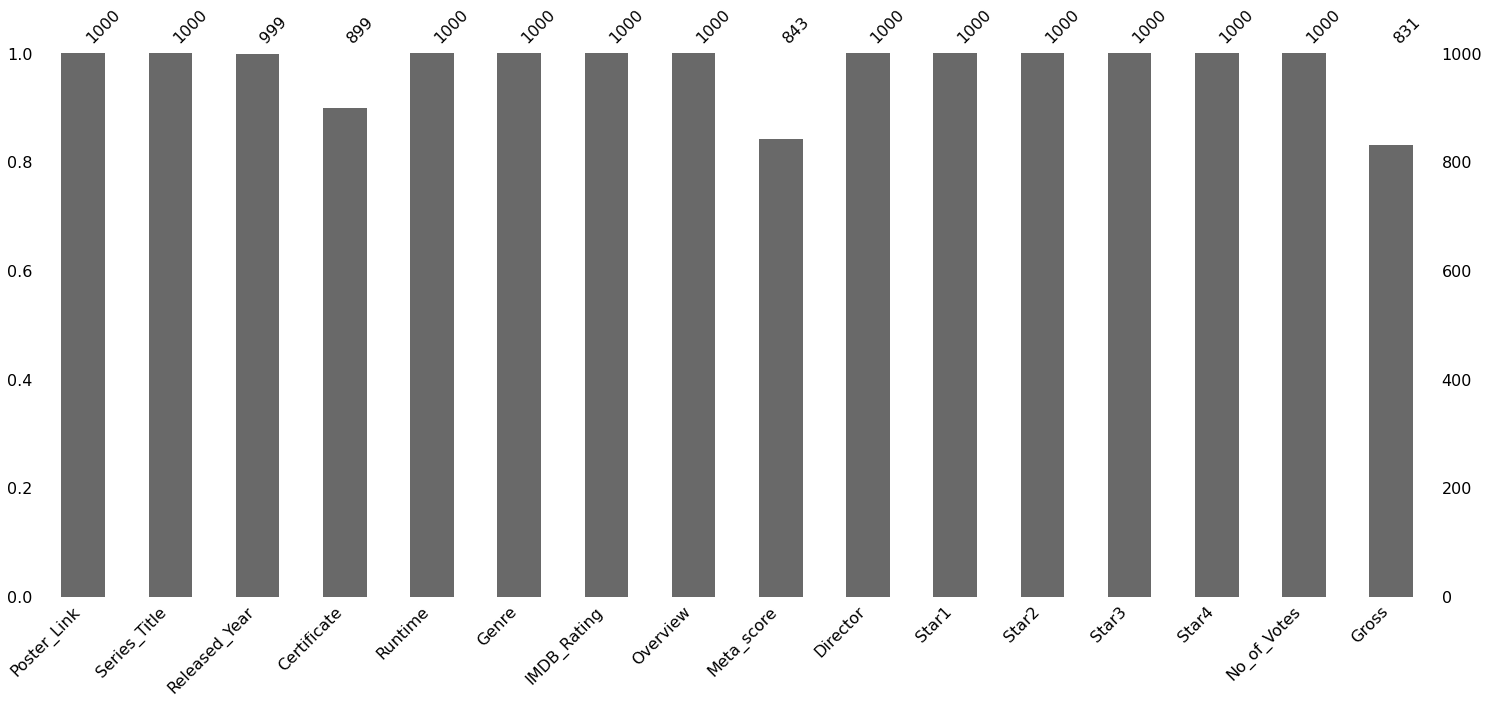

In [19]:
missingno.bar(df)
plt.show()

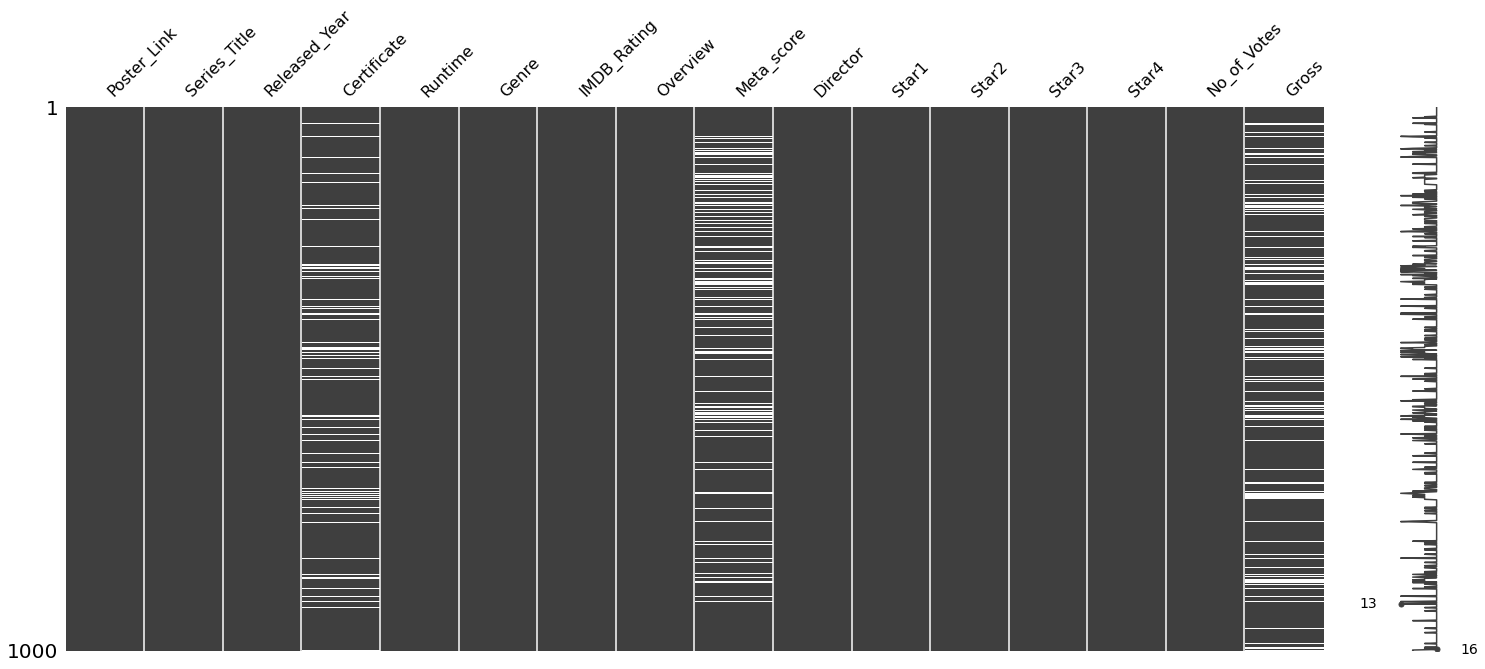

In [20]:
missingno.matrix(df)
plt.show()

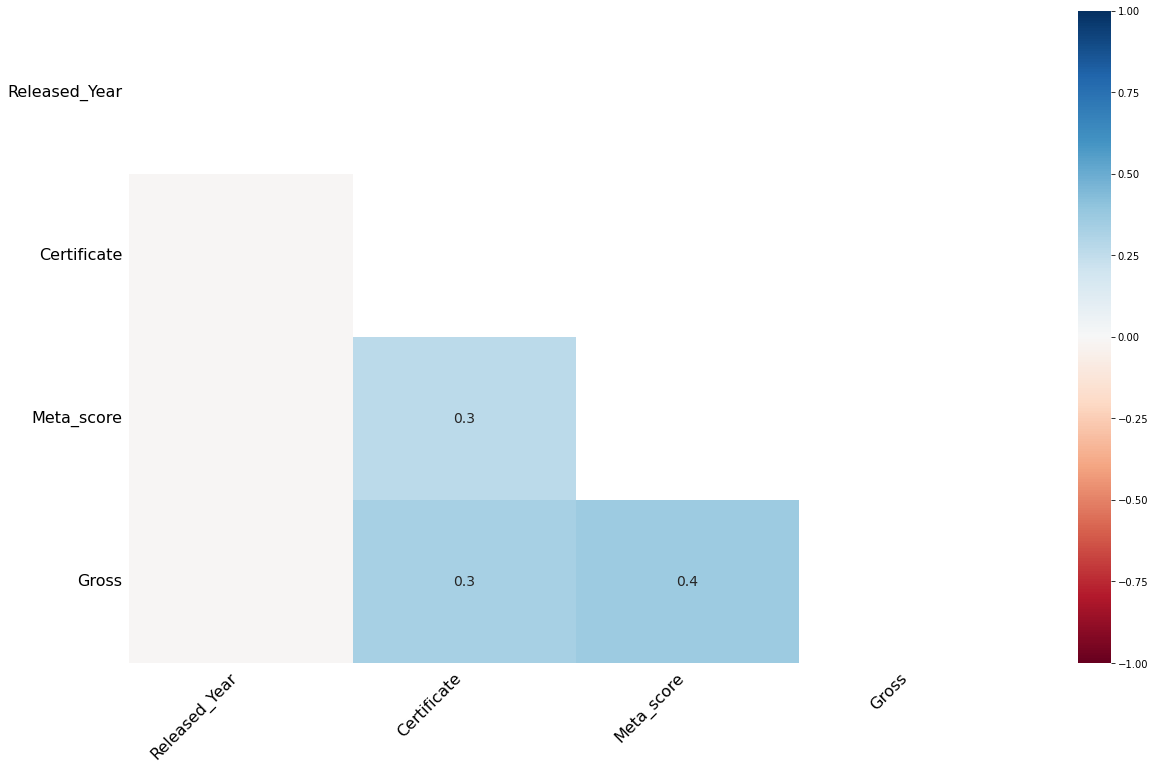

In [21]:
missingno.heatmap(df)
plt.show()

In [22]:
num_cols = df.dtypes[df.dtypes != "O"].index.tolist()

In [23]:
num_cols

['Released_Year',
 'Runtime',
 'IMDB_Rating',
 'Meta_score',
 'No_of_Votes',
 'Gross']

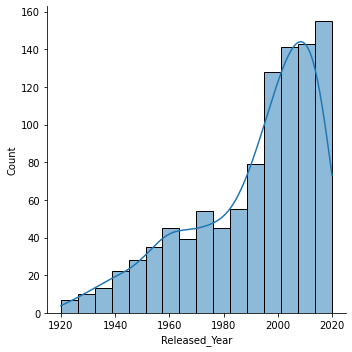

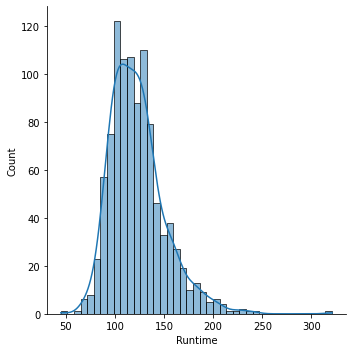

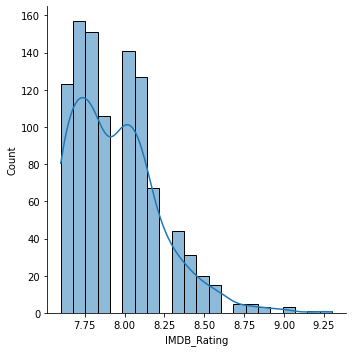

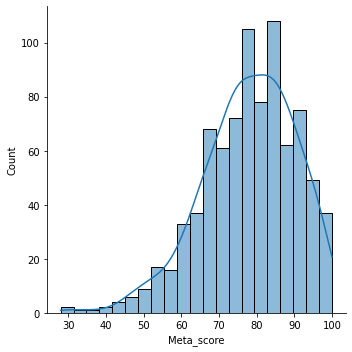

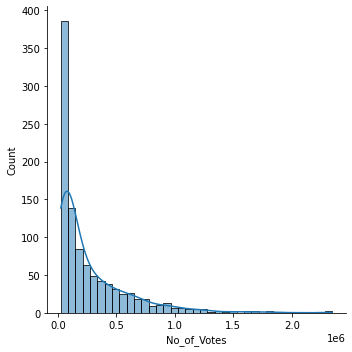

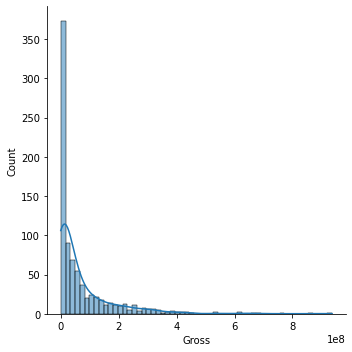

In [24]:
for num_col in num_cols:
  sns.displot(df[num_col], kde=True)
  plt.show()

In [25]:
df.sort_values(by='Gross', ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015.0,U,138.0,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019.0,UA,181.0,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009.0,UA,162.0,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018.0,UA,149.0,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997.0,UA,194.0,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966.0,A,111.0,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,115.0,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,201.0,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,NaN,97.0,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [26]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [27]:
top_directors = df['Director'].value_counts().head(20).index.tolist()

In [28]:
top_directors

['Alfred Hitchcock',
 'Steven Spielberg',
 'Hayao Miyazaki',
 'Martin Scorsese',
 'Akira Kurosawa',
 'Stanley Kubrick',
 'Billy Wilder',
 'Woody Allen',
 'Christopher Nolan',
 'Quentin Tarantino',
 'David Fincher',
 'Clint Eastwood',
 'Rob Reiner',
 'Howard Hawks',
 'Ingmar Bergman',
 'Ridley Scott',
 'Alfonso Cuarón',
 'Charles Chaplin',
 'Richard Linklater',
 'Sergio Leone']

In [29]:
rating_by_director = df.groupby(by = 'Director')['IMDB_Rating'].mean()[top_directors]

In [30]:
rating_by_director = rating_by_director.sort_values(ascending=False)

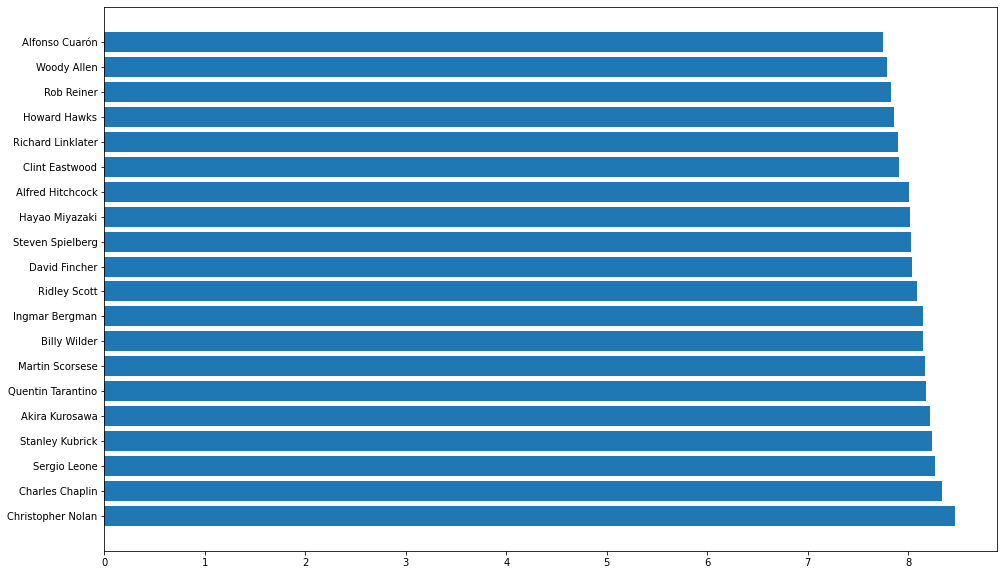

In [31]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_director.index, width=rating_by_director.values)

# plt.yticks(rotation=90)

plt.show()

In [32]:
rating_by_director_meta = df.groupby(by = 'Director')['Meta_score'].mean()[top_directors]

In [33]:
rating_by_director_meta = rating_by_director_meta.sort_values(ascending=False)

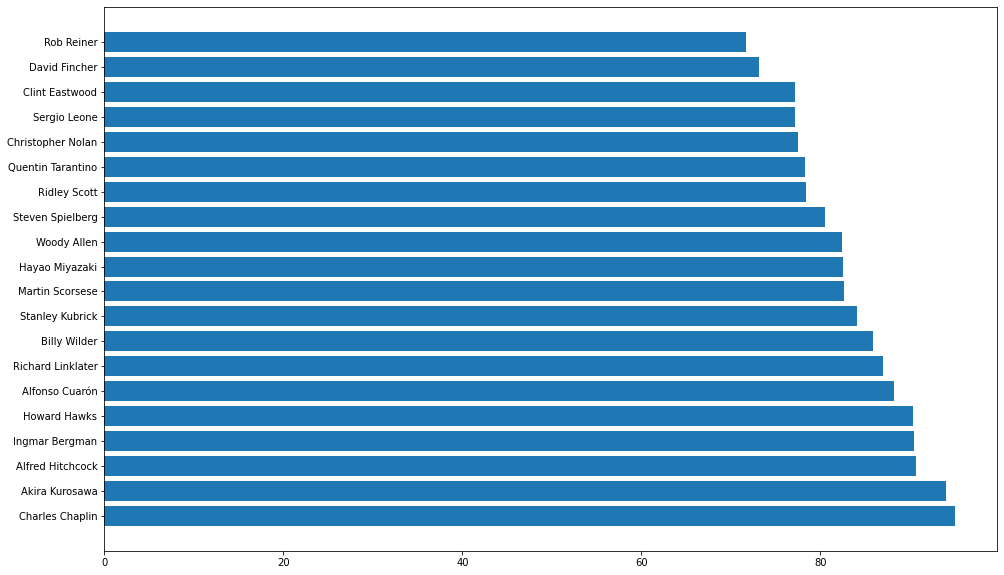

In [34]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_director_meta.index, width=rating_by_director_meta.values)

# plt.yticks(rotation=90)

plt.show()

In [35]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [36]:
favorite_actor = 'Tom Hanks'

In [37]:
star_cols = ['Star1', 'Star2', 'Star3', 'Star4']

In [38]:
present = np.zeros(df.shape[0])
for col in star_cols:
  present += (df[col].apply(lambda x: favorite_actor in x).values * 1)

In [39]:
(present > 1).sum()

0

In [40]:
df_hanks = df[present == 1]

In [41]:
df_hanks.shape

(14, 16)

In [42]:
df_hanks.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
11,https://m.media-amazon.com/images/M/MV5BNWIwOD...,Forrest Gump,1994.0,UA,142.0,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182.0
24,https://m.media-amazon.com/images/M/MV5BZjhkMD...,Saving Private Ryan,1998.0,R,169.0,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",91.0,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,216540909.0
25,https://m.media-amazon.com/images/M/MV5BMTUxMz...,The Green Mile,1999.0,A,189.0,"Crime, Drama, Fantasy",8.6,The lives of guards on Death Row are affected ...,61.0,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,136801374.0
101,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,Toy Story,1995.0,U,81.0,"Animation, Adventure, Comedy",8.3,A cowboy doll is profoundly threatened and jea...,95.0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,887429,191796233.0
151,https://m.media-amazon.com/images/M/MV5BMTgxOT...,Toy Story 3,2010.0,U,103.0,"Animation, Adventure, Comedy",8.2,The toys are mistakenly delivered to a day-car...,92.0,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,757032,415004880.0


In [43]:
df_hanks['IMDB_Rating'].mean()

8.035714285714285

In [44]:
df_hanks.sort_values(by = 'Gross', ascending=False)['Series_Title']

596            Toy Story 4
151            Toy Story 3
11            Forrest Gump
516            Toy Story 2
647              Cast Away
24     Saving Private Ryan
101              Toy Story
966              Apollo 13
243    Catch Me If You Can
25          The Green Mile
604       Captain Phillips
791      Road to Perdition
818           Philadelphia
890        Bridge of Spies
Name: Series_Title, dtype: object

In [45]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [46]:
unique_genres = np.unique(", ".join(df['Genre'].values).split(", "))

In [47]:
len(unique_genres)

21

In [48]:
unique_genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [49]:
for unique_genre in unique_genres:
  df[unique_genre] = df["Genre"].apply(lambda x: unique_genre in x) * 1

In [50]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0,0,0,0,0,0,0,0,0,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0,0,0,0,0,0,0,0,0,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0,0,0,0,0,0,0,0,0,0


In [51]:
unique_genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [52]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [53]:
some_column = 'Gross'
dict_ = {}
for genre in unique_genres:
  dict_[genre] = df[df[genre] == 1][some_column].mean()

In [54]:
dict_

{'Action': 141239282.89102563,
 'Adventure': 165731278.64117646,
 'Animation': 127967528.46268657,
 'Biography': 55256018.708333336,
 'Comedy': 64125296.22513089,
 'Crime': 40680139.92397661,
 'Drama': 46059669.39530988,
 'Family': 92932656.91666667,
 'Fantasy': 108616841.91071428,
 'Film-Noir': 4872073.0,
 'History': 55539532.069767445,
 'Horror': 40002359.22727273,
 'Music': 30267814.333333332,
 'Musical': 20199325.92857143,
 'Mystery': 41274382.14285714,
 'Romance': 40358847.14018691,
 'Sci-Fi': 148026397.04918033,
 'Sport': 53672020.10526316,
 'Thriller': 58676626.64545455,
 'War': 38078294.10810811,
 'Western': 53518837.75}

In [55]:
avg_df = pd.DataFrame({"Genre":dict_.keys(), 'Avg_values': dict_.values()})

In [56]:
avg_df = avg_df.sort_values(by = 'Avg_values', ascending=False)

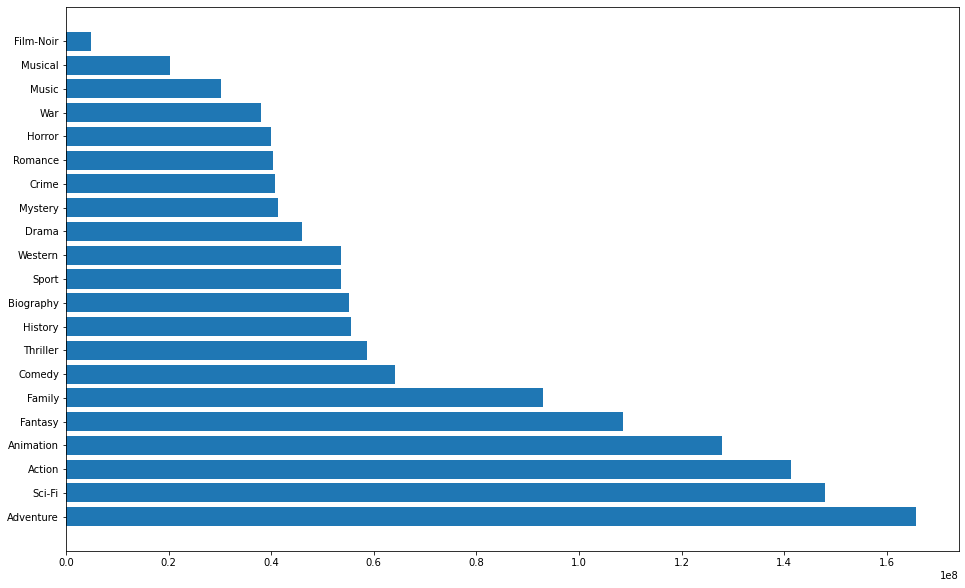

In [57]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=avg_df.Genre, width=avg_df.Avg_values)

# plt.yticks(rotation=90)

plt.show()

In [58]:
global_mean = df.Gross.mean()

In [59]:
global_mean

68034750.87364621

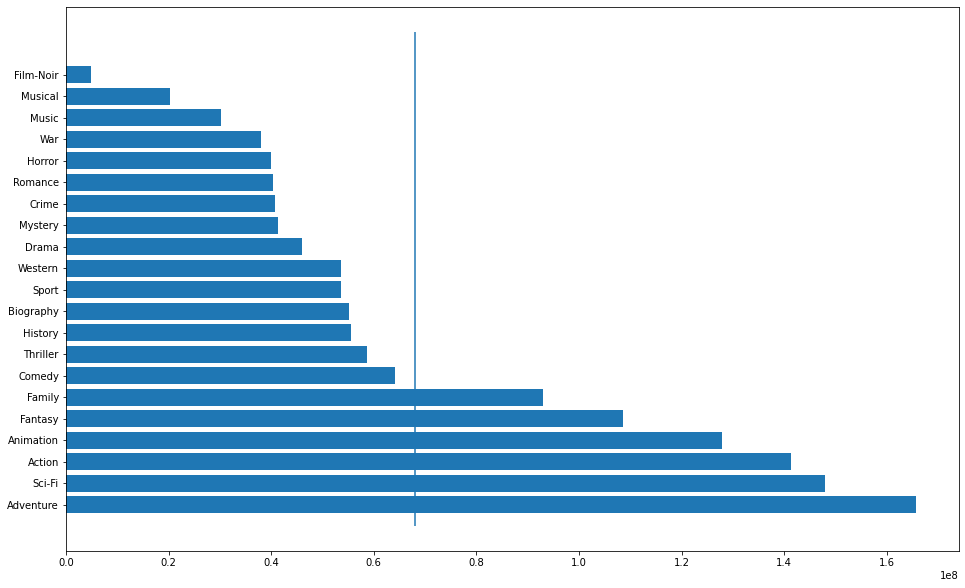

In [60]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=avg_df.Genre, width=avg_df.Avg_values)
ax.vlines(global_mean,  ymin=-1, ymax=avg_df.shape[0]+1)
# plt.yticks(rotation=90)

plt.show()